<a href="https://colab.research.google.com/github/avyaktawrat/Evaluat-inator/blob/master/Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
movies = pd.read_csv('https://raw.githubusercontent.com/avyaktawrat/Evaluat-inator/master/data/movies.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')
users = pd.read_csv('https://raw.githubusercontent.com/avyaktawrat/Evaluat-inator/master/data/users.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')
ratings = pd.read_csv('https://raw.githubusercontent.com/avyaktawrat/Evaluat-inator/master/data/ratings.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')

In [0]:
movies.columns = ['movieID', 'title', 'genres']
users.columns = ['userId',	'gender',	'zipcode',	'age_desc',	'occ_desc']
ratings.columns = ['userId',	'movieId',	'rating',	'timestamp']

# **Observing Dataset**

In [0]:
movies.head()

,movieID,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieID  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [0]:
users.head()

,userId,gender,zipcode,age_desc,occ_desc
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [0]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userId    6040 non-null   int64 
 1   gender    6040 non-null   object
 2   zipcode   6040 non-null   int64 
 3   age_desc  6040 non-null   int64 
 4   occ_desc  6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [0]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [0]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userId     1000209 non-null  int64
 1   movieId    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


***Graph between number of ratings per rating.***

In [0]:
# counting number of users in each rating
df_ratings_cnt_tt = pd.DataFrame(ratings.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tt['log_count'] = np.log(df_ratings_cnt_tt['count'])
df_ratings_cnt_tt

,count,log_count
rating,,
1,56174,10.936209
2,107557,11.585776
3,261197,12.473030
4,348971,12.762744
5,226310,12.329661


Text(0, 0.5, 'number of ratings')

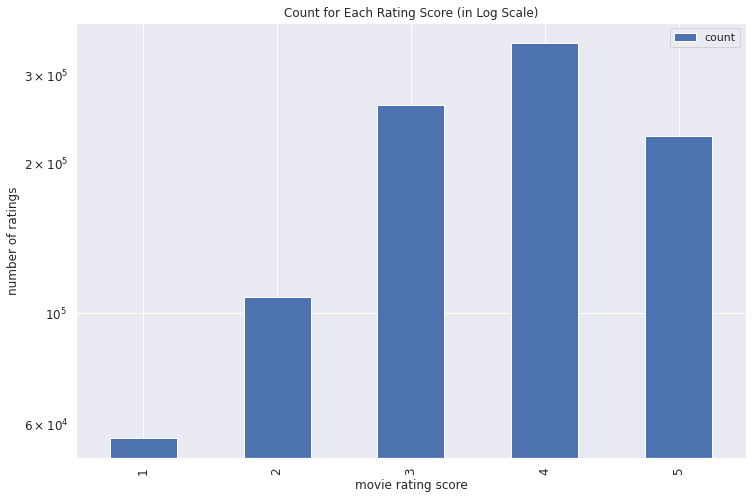

In [0]:
sns.set(style="darkgrid")
ax = df_ratings_cnt_tt[['count']].plot(
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12
)
ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

***Graph between ratings per movieID.***

In [0]:
#counting number of raitngs in a given movieID
df_movies_cnt_t = pd.DataFrame(ratings.groupby('movieId').size(), columns=['count'])
df_movies_cnt_t.head()

,count
movieId,
1,2077
2,701
3,478
4,170
5,296


Text(0, 0.5, 'number of ratings')

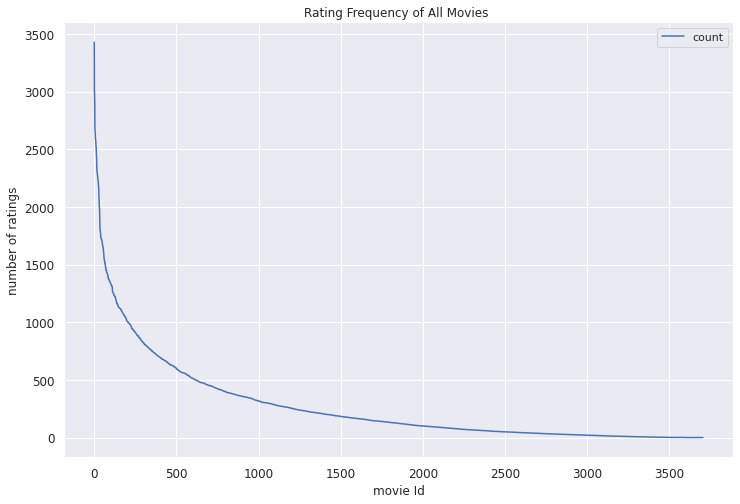

In [0]:
# plot rating frequency of all movies 
sns.set(style="darkgrid")
ax = df_movies_cnt_t \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies ',
        fontsize=12,
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

The graph is highly skewed distribution and very small number of movies are rated frequently.

Text(0, 0.5, 'number of ratings (log scale)')

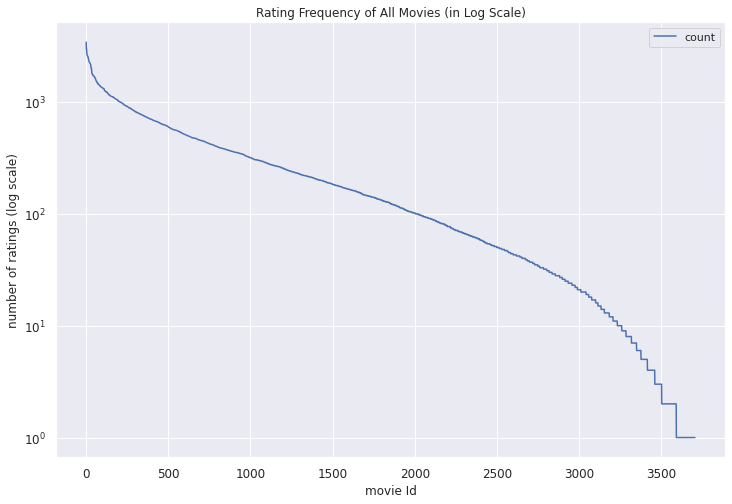

In [0]:
# plot rating frequency of all movies in log scale
sns.set(style="darkgrid")
ax = df_movies_cnt_t \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies (in Log Scale)',
        fontsize=12,
        logy=True
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings (log scale)")

We can see that roughly 2,000 out of ~4k movies are rated more than 100 times.

In [0]:
df_movies_cnt_t['count'].quantile(np.arange(1, 0.6, -0.05))

1.00    3428.00
0.95    1051.50
0.90     729.50
0.85     553.25
0.80     429.00
0.75     350.00
0.70     280.00
0.65     228.00
Name: count, dtype: float64

So about 1% of movies have roughly 3428 or more ratings, 5% have 1,051 or more, and 20% have 429 or more




Plot between genre and number of movies.

In [0]:
#replacing '|' with a space 
movies['genres'] = movies['genres'].astype(str).str.replace('|', ' ')
movies['genres'] = movies['genres'].str.lower()
movies['genres'] = movies['genres'].astype(str).str.replace('sci fi', 'sci_fi')
#removing those elements that don't have genres listed
movies= movies.loc[movies['genres'] != '(no genres listed)']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# Fit, transform, and convert into array
cv.fit(movies['genres'])

cv_transformed = cv.transform(movies['genres'])
cv_array = cv_transformed.toarray()

# Create a DataFrame with these features
genre_df = pd.DataFrame(cv_array, 
                     columns=cv.get_feature_names())

# finding count of movies from each data set
genre_ = genre_df.sum(axis = 0)
genre_ = pd.DataFrame(genre_).reset_index()
genre_.columns = ['Genre', 'count']
# genre_.drop([16])
genre_

,Genre,count
0,action,503
1,adventure,283
2,animation,105
3,children,251
4,comedy,1200
5,crime,211
6,documentary,127
7,drama,1603
8,fantasy,68
9,fi,276


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

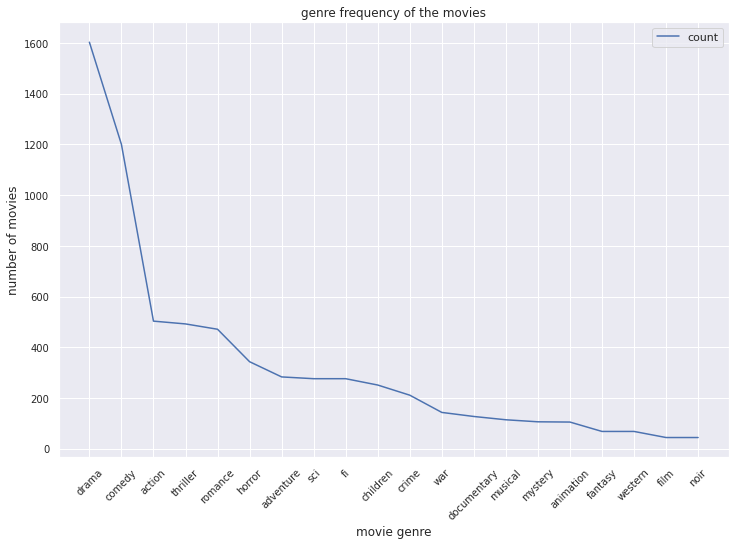

In [0]:
sns.set(style="darkgrid")
genre_ = genre_.sort_values(by = 'count', ascending = False)
y_pos = np.arange(genre_.shape[0])
ax = genre_ \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='genre frequency of the movies',
        fontsize=10,
    )
ax.set_xticks(y_pos)
ax.set_xticklabels(genre_['Genre'])
ax.set_xlabel("movie genre")
ax.set_ylabel("number of movies")
plt.xticks(rotation=45)

There are 5 genre which have more than 400 movies and about 11 genres with less than 200 movies.
